In [1]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
import json
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

os.chdir('c://users/grlurton/documents/niger_election_data')

In [2]:
aa = os.listdir('data/raw/tabula-RENALOC_Niger_733/')

In [72]:
def get_data(adress) :
    url = 'data/raw/tabula-RENALOC_Niger_733/' + adress
    try :
        liste_depts = pd.read_csv( url , encoding = "ISO-8859-1" , )
    
        if len(liste_depts.columns) >= 8 :
            liste_depts = liste_depts.reset_index()
            liste_depts = liste_depts.drop(0)
            if len(liste_depts.columns) >= 9 :
                liste_depts = liste_depts.iloc[: , [0,1,3,4,5,6,7]]
            liste_depts.columns = ['locality' , 'population' , 'hommes', 'femmes' , 'menages' , 'menages_agricoles' , 'geoloc']
        if len(liste_depts.columns) < 7:
            liste_depts = float('nan')
        return liste_depts   
    except (ValueError , IndexError) :
        liste_depts = float('nan') 

In [89]:
url = 'data/raw/tabula-RENALOC_Niger_733/' + 'tabula-RENALOC_Niger_733-650.csv'
try :
    liste_depts = pd.read_csv( url , encoding = "ISO-8859-1" , )
except  (ValueError):
    liste_depts = float('nan')
#liste_depts = liste_depts.reset_index()

In [6]:
order = []

for n in range(len(aa)) :
    u = aa[n].split('-')[2].split('.')[0]
    order = order + [int(u)]
order = sorted(order)

In [212]:
renaloc = []
for i in order :
    addresse = 'tabula-RENALOC_Niger_733-' + str(i) + '.csv'
    dat = get_data(addresse)
    #print(addresse)
    if (dat.__class__.__name__ == 'DataFrame') :
        print(addresse)
        if (len(renaloc) == 0) :            
            renaloc = dat
        if (len(renaloc) > 0) :
            renaloc = renaloc.append(dat , ignore_index = True)

tabula-RENALOC_Niger_733-10.csv
tabula-RENALOC_Niger_733-14.csv
tabula-RENALOC_Niger_733-15.csv
tabula-RENALOC_Niger_733-27.csv
tabula-RENALOC_Niger_733-48.csv
tabula-RENALOC_Niger_733-53.csv
tabula-RENALOC_Niger_733-65.csv
tabula-RENALOC_Niger_733-69.csv
tabula-RENALOC_Niger_733-116.csv
tabula-RENALOC_Niger_733-117.csv
tabula-RENALOC_Niger_733-118.csv
tabula-RENALOC_Niger_733-119.csv
tabula-RENALOC_Niger_733-120.csv
tabula-RENALOC_Niger_733-121.csv
tabula-RENALOC_Niger_733-122.csv
tabula-RENALOC_Niger_733-123.csv
tabula-RENALOC_Niger_733-124.csv
tabula-RENALOC_Niger_733-125.csv
tabula-RENALOC_Niger_733-126.csv
tabula-RENALOC_Niger_733-127.csv
tabula-RENALOC_Niger_733-128.csv
tabula-RENALOC_Niger_733-129.csv
tabula-RENALOC_Niger_733-130.csv
tabula-RENALOC_Niger_733-131.csv
tabula-RENALOC_Niger_733-132.csv
tabula-RENALOC_Niger_733-133.csv
tabula-RENALOC_Niger_733-134.csv
tabula-RENALOC_Niger_733-135.csv
tabula-RENALOC_Niger_733-136.csv
tabula-RENALOC_Niger_733-137.csv
tabula-RENALOC_Nig

In [213]:
renaloc['level']  = renaloc['region'] = renaloc['departement'] = renaloc['commune'] = renaloc['milieu'] = \
        region = departement = commune = nom_sup = level = ''
for i in range(1,len(renaloc)) :
    
    u = renaloc.iloc[i]
    name = u.locality
    try :
        splitted = name.split(':')
        if (len(splitted) >= 2) :
            splitted[0] = splitted[0].replace(' ' , '')
            if (splitted[0] == 'REGIONDE') :
                renaloc.loc[i,'level']= level = 'Region'
                region = splitted[1]
                renaloc.loc[i,'region'] = region
            if (splitted[0] == 'DEPARTEMENTDE') :
                renaloc.loc[i,'level']= level = 'Departement'
                departement = splitted[1]
                
                renaloc.loc[i,'region'] = region
                renaloc.loc[i,'departement'] = departement
            if (splitted[0] == 'COMMUNEDE') :
                renaloc.loc[i,'level']= level = 'Commune'
                commune = splitted[1]
                
                renaloc.loc[i,'region'] = region
                renaloc.loc[i,'departement'] = departement
                renaloc.loc[i,'commune'] = commune
            if (splitted[1] == ' Urbain') :
                renaloc.loc[i ,'milieu'] = 'Urbain'
            if (splitted[1] == ' Rural') :
                renaloc.loc[i, 'milieu'] = 'Rural'
            if (level == 'Region'):
                renaloc.loc[i , 'region'] = region
                
                renaloc.loc[i , 'level'] = level
            if (level == 'Departement') :
                renaloc.loc[i , 'region'] = region
                renaloc.loc[i , 'departement'] = departement
                
                renaloc.loc[i , 'level'] = level
            if (level == 'Commune') :
                renaloc.loc[i , 'region'] = region
                renaloc.loc[i , 'departement'] = departement
                renaloc.loc[i , 'commune'] = commune
                
                renaloc.loc[i , 'level'] = level
        else :
            renaloc.loc[i , 'level'] = 'Localite'
            renaloc.loc[i , 'region'] = region
            renaloc.loc[i , 'departement'] = departement
            renaloc.loc[i , 'commune'] = commune
    except (RuntimeError, TypeError, NameError , AttributeError):
        pass

In [214]:
def conversion(old):
    new = old.replace(u'°',' ').replace('\'',' ').replace('"',' ')
    new = new.split()
    new_dir = new.pop()
    new.extend([0,0,0])
    return (int(new[0])+int(new[1])/60.0+int(new[2])/3600.0)

In [215]:
def extract_gps(pdf_string):
    long = pdf_string.split(';')[0]
    
    coord1 = long.split(':')[1].split("Â°")[0]
    coord2 = long.split('Â')[1].split(',')[0]
    coord3 = long.split(',')[1].split(';')[0]
    
    long = coord1 + coord2 + coord3
    
    long = long.replace('\\' , '').replace('"','').replace(' ',"")
    
    lat = pdf_string.split(';')[1]
    coord4 = lat.split("Â°")[0]
    coord4 = coord4.replace("l" , "").replace(':','')
    coord5 = lat.split('Â')[1].split(",")[0]
    coord6 = lat.split(',')[1].split(")")[0]
    
    lat =  coord4 + coord5 + coord6
    
    return [long , lat]

In [ ]:
ren_save = renaloc

In [243]:
def float_all(data , exceptions):
    if (data.__class__.__name__ != 'float') :
        try :
            data = data.split('\r')[0]
            data = float(data)
        except (ValueError) :
            data = float('nan')
    
    if data in exceptions :
        data = float('nan') 

    return data

In [ ]:
renaloc = ren_save
num_variables = ['femmes', 'geoloc', 'hommes', 'locality','menages', 'menages_agricoles', 'population']
exceptions = [ "(L:007Â°53',518 ; l:15Â°37',200)" , "LAQUELLE LA " ,  'LOCALITE EST ' , 'NOMS DES ' , 'MILIEU ' ,
             'RECENSEE ' , 'ZDS ' , 'LOCALITES ' , 'DEPARTEMENTS ' , 'RURAL ' , 'TIMIA ']

renaloc['longitude'] = renaloc['latitude'] = ''
renaloc = renaloc.reset_index()
for i in range(len(renaloc)):
    for var in range(len(num_variables)):
        variable = num_variables[var]
        renaloc.loc[i , variable] = float_all(renaloc.loc[i , variable] , exceptions)
    
    
    gps = renaloc.loc[i , 'geoloc']
    if pd.isnull(gps) == False :
        try :
            gps_list = extract_gps(gps)
            if (conversion(gps_list[0]) > 0) & (conversion(gps_list[1]) > 10) :
                renaloc.loc[i , 'longitude'] = conversion(gps_list[0])
                renaloc.loc[i , 'latitude'] = conversion(gps_list[1])
        except (IndexError) :
            print('Index Error at ' + str(i))

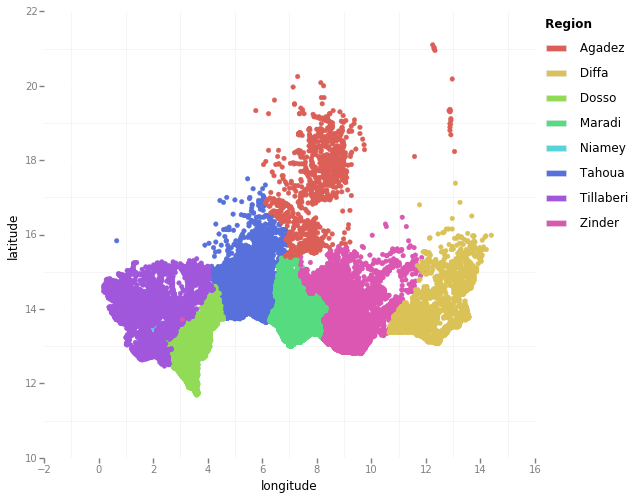

<ggplot: (-9223371971697660556)>

In [96]:
ggplot(aes(x = 'longitude' , y = 'latitude' , colour = 'region') , data = aa) + geom_point() + theme_bw()

In [197]:
aa['hommes'].sum(skipna = True)

7789798.0

In [118]:
aa.loc[:, ('femmes', 'hommes', 'locality', 'menages',
       'menages_agricoles', 'population', 'level', 'region', 'departement',
       'commune', 'longitude', 'latitude')]

,femmes,hommes,locality,menages,menages_agricoles,population,level,region,departement,commune,longitude,latitude
225,2292,2380,ADERBISSINAT : Urbain,790,49,4672,Commune,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.88333,15.6167
227,69,71,ABANE,25,25,140,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,8.35,16.0833
229,344,360,ABALAMA,137,49,704,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.81667,16.2667
230,54,65,ABDAL,25,25,119,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.98333,15.9167
232,97,91,ADAKARO,31,29,188,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.73333,16.0833
233,59,65,ADAM,17,17,124,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.61667,16
234,14,14,AFNO,7,7,28,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.93333,16.0667
235,19,21,AFALA,6,5,40,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.96667,15.75
236,127,158,AGALAL N'GAREN,54,52,285,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.85,16.8167
238,70,71,AGGADEY,28,26,141,Localite,AGADEZ,\rADERBISSINAT,ADERBISSINAT,7.36667,15.6
